In [7]:
#Import the library
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [8]:
# Declare the variabel
IMAGE_BATCH = 32
IMAGE_SIZE = 256
EPOCHS = 20

In [9]:
#Make dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset-tomatoes",
    shuffle=True,
    batch_size=IMAGE_BATCH,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
)

Found 16011 files belonging to 10 classes.


In [10]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

From this we know there's **10 classes** or it can say **10 condition** of tomatoes

In [11]:
#to know how long dataset every batch
len(dataset)

501

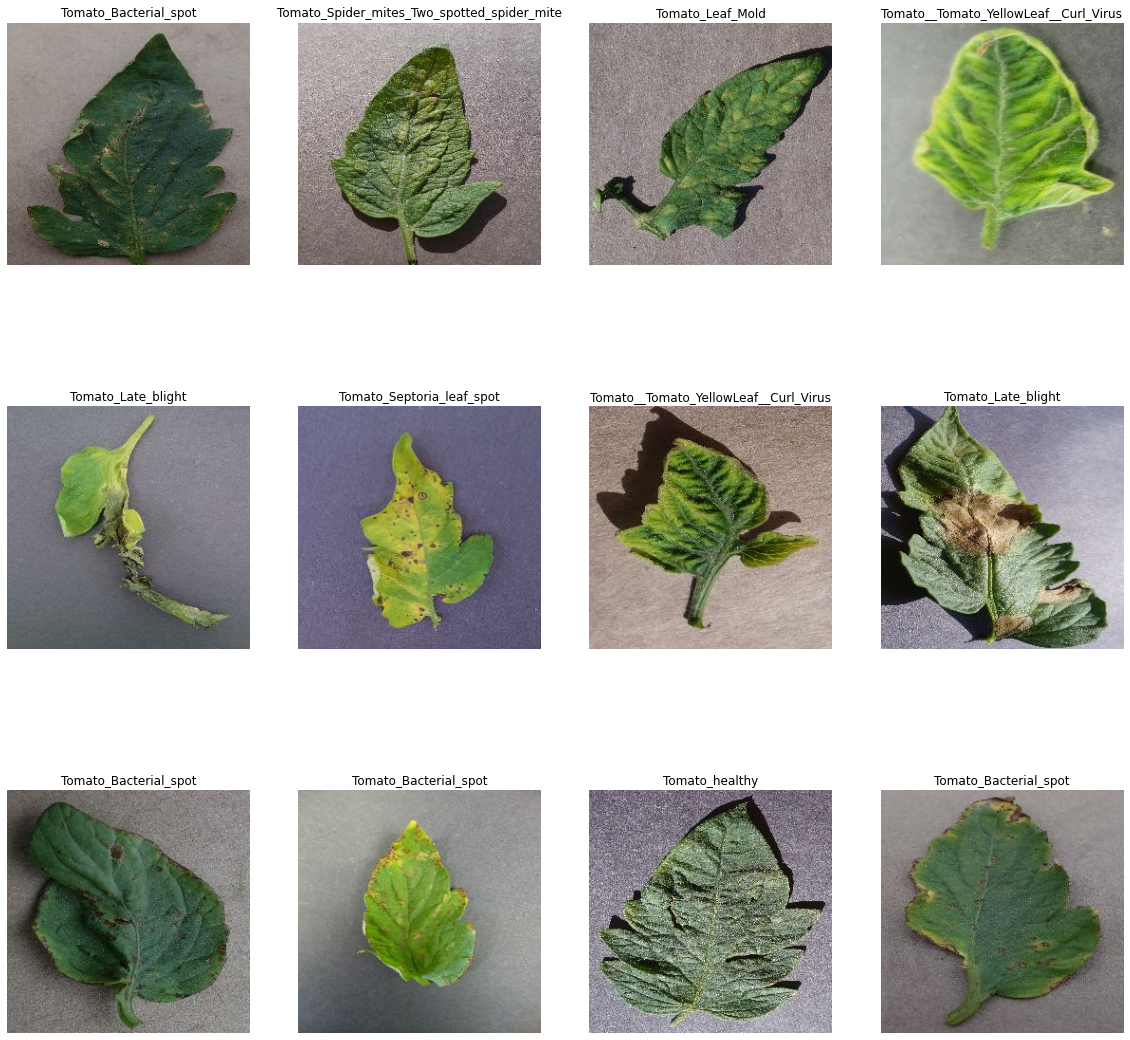

In [12]:
# showing the sample image
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):# take in this meaning batch 1
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
#         print(image_batch)
#         print(image_batch.numpy())
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [13]:
# function for get 80% data of train, 10% data of validation, and 10% data of test.
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=17)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
# Input dataset to function
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [15]:
# Make sure how many data partiton
print("Data Train we have      = "+str(len(train_ds)))
print("Data Validation we have = "+str(len(val_ds)))
print("Data Test we have       = "+str(len(test_ds)))

Data Train we have      = 400
Data Validation we have = 50
Data Test we have       = 51


In [16]:
#use chace and prefetch
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
#layer to rescaling and resize one image for all
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
#layer to flip in horizontal or vertical and rotate picture one image for all
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.25),
])

In [19]:
#another Variabel for model
n_classes = len(class_names)
input_shape = (IMAGE_BATCH, IMAGE_SIZE, IMAGE_SIZE, n_classes)

# Building  a model with CNN
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [15]:
model.build(input_shape=input_shape)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_ds,
    batch_size=IMAGE_BATCH,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
400/400 [==============================] - 3868s 8s/step - loss: 1.5645 - accuracy: 0.5671 - val_loss: 0.7360 - val_accuracy: 0.7675
Epoch 2/20
400/400 [==============================] - 1220s 3s/step - loss: 0.5976 - accuracy: 0.7956 - val_loss: 0.4366 - val_accuracy: 0.8431
Epoch 3/20
400/400 [==============================] - 1336s 3s/step - loss: 0.4283 - accuracy: 0.8507 - val_loss: 0.3284 - val_accuracy: 0.8906
Epoch 4/20
400/400 [==============================] - 1219s 3s/step - loss: 0.3367 - accuracy: 0.8844 - val_loss: 0.2029 - val_accuracy: 0.9300
Epoch 5/20
400/400 [==============================] - 1343s 3s/step - loss: 0.2836 - accuracy: 0.9025 - val_loss: 0.2021 - val_accuracy: 0.9300
Epoch 6/20
400/400 [==============================] - 1389s 3s/step - loss: 0.2459 - accuracy: 0.9167 - val_loss: 0.3280 - val_accuracy: 0.8875
Epoch 7/20
400/400 [==============================] - 1369s 3s/step - loss: 0.2023 - accuracy: 0.9293 - val_loss: 0.2589 - val_accuracy:

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [ ]:
scores = model.evaluate(test_ds)

In [16]:
model.save(f"../saved_models/1")

INFO:tensorflow:Assets written to: ../saved_models/1\assets


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.save(f"../saved_models/{model_version}")

In [20]:
new_model = tf.keras.models.load_model('../saved_models/1')

In [21]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [23]:
scores = new_model.evaluate(test_ds)

51/51 [==============================] - 421s 1s/step - loss: 0.0920 - accuracy: 0.9724


first image to predict
actual label: Tomato_Late_blight
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


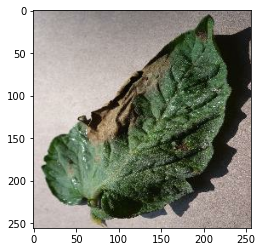

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

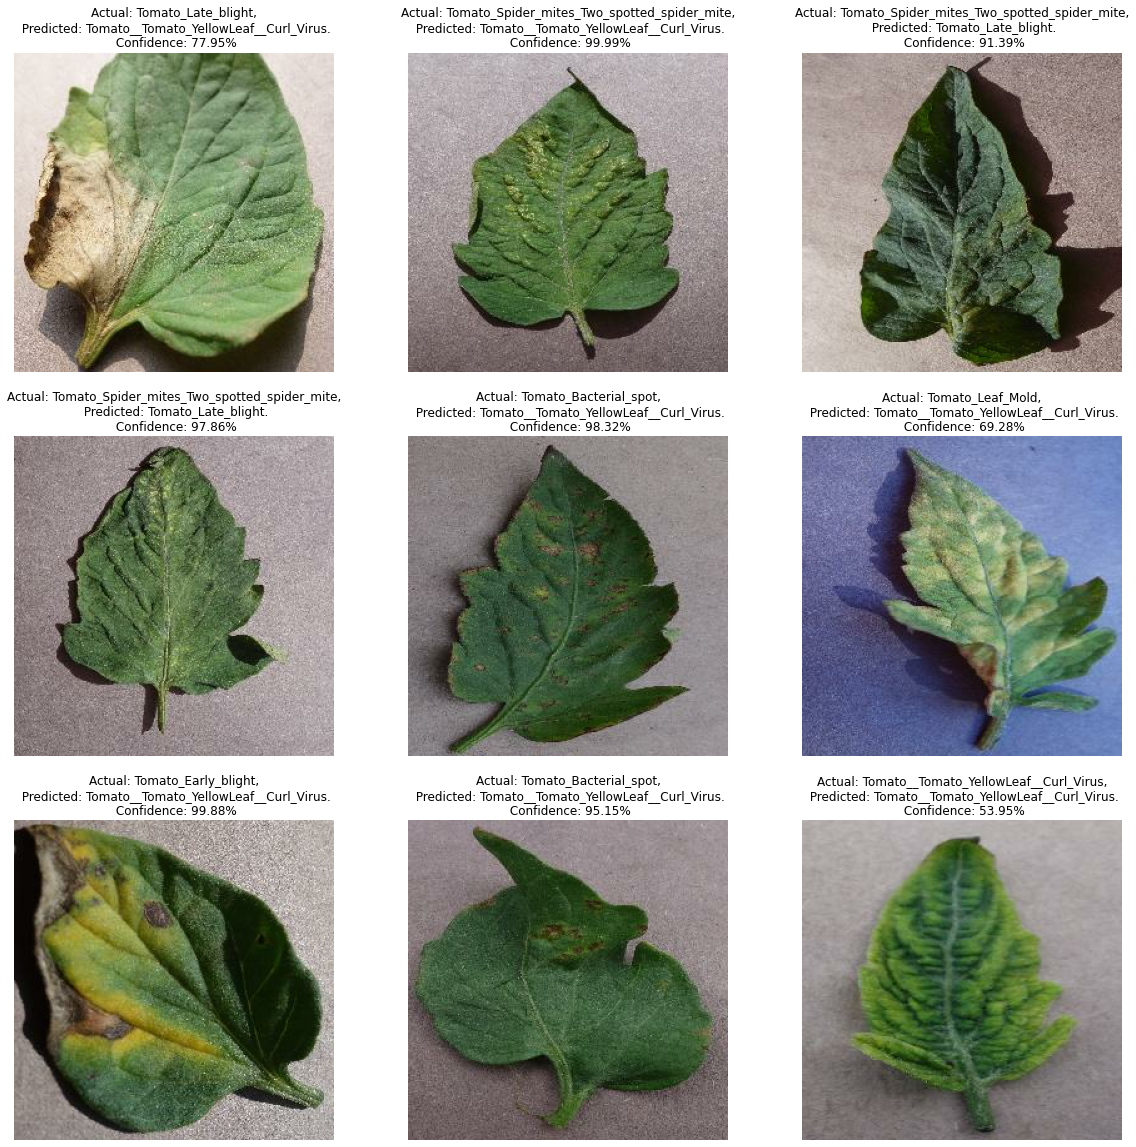

In [37]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")